<a href="https://colab.research.google.com/github/shreytanwar/MNIST-CNN/blob/main/mnist_model_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

import keras.backend as K

import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

Text(0.5, 0, '5')

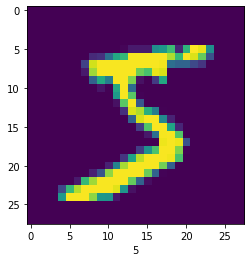

In [3]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
if(K.image_data_format() == 'channels_first'):
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28 , 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

**Apply oneHotEncoder**

In [9]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

y_train = (columnTransformer.fit_transform(y_train)).toarray()
y_test = (columnTransformer.fit_transform(y_test)).toarray()    

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

*MODEL*

In [11]:
model = Sequential()

model.add(Conv2D(28, (3,3), padding = 'same', activation='relu', input_shape =input_shape))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Conv2D(64, (3,3), padding= 'same', activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout (rate = 0.25))

model.add(Dense(64, activation= 'relu'))
model.add(Dropout (rate = 0.25))

model.add(Dense(10, activation= "softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,batch_size=256,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
235/235 [==============================] - 55s 236ms/step - loss: 0.3990 - accuracy: 0.8756 - val_loss: 0.0684 - val_accuracy: 0.9778
Epoch 2/50
235/235 [==============================] - 55s 234ms/step - loss: 0.1021 - accuracy: 0.9698 - val_loss: 0.0451 - val_accuracy: 0.9849
Epoch 3/50
235/235 [==============================] - 55s 234ms/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0386 - val_accuracy: 0.9870
Epoch 4/50
235/235 [==============================] - 55s 233ms/step - loss: 0.0557 - accuracy: 0.9837 - val_loss: 0.0345 - val_accuracy: 0.9877
Epoch 5/50
235/235 [==============================] - 55s 233ms/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.0276 - val_accuracy: 0.9909
Epoch 6/50
235/235 [==============================] - 55s 233ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 7/50
235/235 [==============================] - 54s 232ms/step - loss: 0.0333 - accuracy: 0.9903 - val_loss: 0.0305 - val_ac

In [13]:
model.save('mnist.h5')